# A6_pandas_with_joins

# IS590PR Fall 2018

Team Members:  
Sayed Shazeb Hussain
Sayantan Dutta
Janki Thakkar

In [211]:
#Importing all the required libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile

Part 1: Baseball specific analysis

In [212]:
#Loading the required files from baseball data zip
people = pd.read_csv("baseballdatabank-master_2018-03-28/baseballdatabank-master/core/People.csv")
batting = pd.read_csv("baseballdatabank-master_2018-03-28/baseballdatabank-master/core/Batting.csv")
appearance = pd.read_csv("baseballdatabank-master_2018-03-28/baseballdatabank-master/core/Appearances.csv")
schools = pd.read_csv("baseballdatabank-master_2018-03-28/baseballdatabank-master/core/Schools.csv")
hall_of_fame = pd.read_csv("baseballdatabank-master_2018-03-28/baseballdatabank-master/core/HallOfFame.csv")
college = pd.read_csv("baseballdatabank-master_2018-03-28/baseballdatabank-master/core/CollegePlaying.csv")
pitching = pd.read_csv("baseballdatabank-master_2018-03-28/baseballdatabank-master/core/Pitching.csv")

Ans 1: Top 20 players in career success for stealing bases

In [213]:
people.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [214]:
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [215]:
#In this code section we are calculating Net stolen bases and then getting the sum of Net Stolen Bases, Stolen Bases and Caught
#Stealing for each player.
#The sum is calculated here in order to get the values for their entire carrer
batting['Net Stolen Bases'] = batting['SB'] - batting['CS']
batting_calc = pd.Series.to_frame(batting.groupby(["playerID"])["Net Stolen Bases"].sum())
batting_calc["Stolen Bases"] = batting.groupby(["playerID"])["SB"].sum()
batting_calc["Caught Stealing"] = batting.groupby(["playerID"])["CS"].sum()
batting_calc.head()

,Net Stolen Bases,Stolen Bases,Caught Stealing
playerID,,,
aardsda01,0.0,0.0,0.0
aaronha01,167.0,240.0,73.0
aaronto01,1.0,9.0,8.0
aasedo01,0.0,0.0,0.0
abadan01,-1.0,0.0,1.0


In [216]:
#Calculating Success Rate for each player
batting_calc["Success Rate"] = (batting_calc["Net Stolen Bases"] / batting_calc["Stolen Bases"] ) * 100
batting_calc.head()

,Net Stolen Bases,Stolen Bases,Caught Stealing,Success Rate
playerID,,,,
aardsda01,0.0,0.0,0.0,NaN
aaronha01,167.0,240.0,73.0,69.583333
aaronto01,1.0,9.0,8.0,11.111111
aasedo01,0.0,0.0,0.0,NaN
abadan01,-1.0,0.0,1.0,-inf


In [217]:
#Merging the calculated values with people dataset to get all the details about player
people_batting = pd.merge(batting_calc, people, on='playerID')

In [218]:
#Listing details of top 20 players based on success rate
people_batting[['nameGiven', 'playerID', 'Stolen Bases', 'Caught Stealing', 'Net Stolen Bases', 'Success Rate']].sort_values(by=['Success Rate','nameGiven'], ascending=[False,True]).head(20)

,nameGiven,playerID,Stolen Bases,Caught Stealing,Net Stolen Bases,Success Rate
7883,Aaron Keith,holbeaa01,1.0,0.0,1.0,100.0
13376,Adalberto,penabe01,1.0,0.0,1.0,100.0
17170,Albert,thakeal01,2.0,0.0,2.0,100.0
18993,Albert Arthur,yatesal01,1.0,0.0,1.0,100.0
15479,Albert Bringhurst,schroal01,1.0,0.0,1.0,100.0
13890,Albert George,prattal01,1.0,0.0,1.0,100.0
11792,Albert Joseph,milnaal01,1.0,0.0,1.0,100.0
6233,Albert Shawn,gilbesh01,2.0,0.0,2.0,100.0
10365,Albert Walter,lylesp01,1.0,0.0,1.0,100.0
6818,Alexander,guerral01,1.0,0.0,1.0,100.0


Ans 2: Plot of average height 

In [219]:
people.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [220]:
appearance.head()

,yearID,teamID,lgID,playerID,G_all,GS,G_batting,G_defense,G_p,G_c,...,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,1871,TRO,NaN,abercda01,1,1.0,1,1.0,0,0,...,0,0,1,0,0,0,0,0.0,0.0,0.0
1,1871,RC1,NaN,addybo01,25,25.0,25,25.0,0,0,...,22,0,3,0,0,0,0,0.0,0.0,0.0
2,1871,CL1,NaN,allisar01,29,29.0,29,29.0,0,0,...,2,0,0,0,29,0,29,0.0,0.0,0.0
3,1871,WS3,NaN,allisdo01,27,27.0,27,27.0,0,27,...,0,0,0,0,0,0,0,0.0,0.0,0.0
4,1871,RC1,NaN,ansonca01,25,25.0,25,25.0,0,5,...,2,20,0,1,0,0,1,0.0,0.0,0.0


In [221]:
#Merging the people and appearance dataset using playerID, to get all the data related to player
people_appearance = pd.merge(people, appearance, on=["playerID"])
people_appearance.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,G_2b,G_3b,G_ss,G_lf,G_cf,G_rf,G_of,G_dh,G_ph,G_pr
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0.0
1,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0.0
2,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0.0
3,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0.0
4,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0.0


In [222]:
#Calculation average height of per year by grouping on yearID
avg_height_per_year = people_appearance[["yearID", "playerID", "height"]].fillna(0)
avg_height_per_year.shape

(104256, 3)

In [223]:
#Duplicates in the same year are dropped in order to avoid repetition of values in mean calculation
avg_height_per_year = avg_height_per_year.drop_duplicates()
avg_height_per_year = avg_height_per_year.groupby(["yearID"])["height"].mean()
avg_height_per_year = pd.Series.to_dict(avg_height_per_year)

Text(0,0.5,'Average Height')

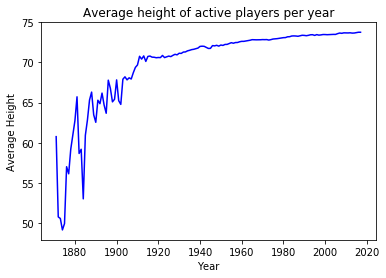

In [224]:
#Plotting Year v/s Average height data
plt.plot(avg_height_per_year.keys(), avg_height_per_year.values(), color = "blue")
plt.title("Average height of active players per year")
plt.xlabel("Year")
plt.ylabel("Average Height")

Ans 4: 20 most dangerous pitchers derived from their career total statistics

In [225]:
pitching.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'W', 'L', 'G', 'GS',
       'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp',
       'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP'],
      dtype='object')

In [226]:
pitching.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,7,NaN,0,146.0,0,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,7,NaN,0,1291.0,0,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,2,NaN,0,14.0,0,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,20,NaN,0,1080.0,1,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,0,NaN,0,57.0,0,21,NaN,NaN,NaN


In [227]:
people.columns

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID'],
      dtype='object')

In [228]:
people.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [229]:
#Removing the NA values for HBP and IPouts and then calculating sum for IPouts
pitching = pitching.dropna(subset = ['HBP','IPouts'])
total_outs_pitched = pitching.groupby('playerID')['IPouts'].sum().to_frame() #The series is converted to frame for joining
total_outs_pitched.head()

,IPouts
playerID,
aardsda01,1011
aasedo01,3328
abadfe01,953
abbeybe01,1704
abbeych01,6


In [230]:
#calculating sum for HBP
total_HBP = pitching.groupby('playerID')['HBP'].sum().to_frame()
total_HBP.head()

,HBP
playerID,
aardsda01,16.0
aasedo01,7.0
abadfe01,12.0
abbeybe01,26.0
abbeych01,0.0


In [231]:
#Merging the two datasets and removing the 0 values
total_pitched_HBP = pd.merge(total_outs_pitched,total_HBP, how = 'inner', on = 'playerID')
total_pitched_HBP = total_pitched_HBP[total_pitched_HBP['IPouts'] != 0]
total_pitched_HBP.head()

,IPouts,HBP
playerID,,
aardsda01,1011,16.0
aasedo01,3328,7.0
abadfe01,953,12.0
abbeybe01,1704,26.0
abbeych01,6,0.0


In [232]:
#Calculation rate of hitting for each player
total_pitched_HBP['Rates_of_hitting'] = total_pitched_HBP['HBP'] / total_pitched_HBP['IPouts']
total_pitched_HBP.head()

,IPouts,HBP,Rates_of_hitting
playerID,,,
aardsda01,1011,16.0,0.015826
aasedo01,3328,7.0,0.002103
abadfe01,953,12.0,0.012592
abbeybe01,1704,26.0,0.015258
abbeych01,6,0.0,0.000000


In [233]:
#Merging with people dataset to get additional data about players
player_pitching = pd.merge(people,total_pitched_HBP, how = 'inner', on = 'playerID')
player_pitching['Name'] = player_pitching['nameFirst'] + ' ' + player_pitching['nameLast']
player_pitching['Given Name'] = player_pitching['nameGiven']
#Displaying the top 20 players based on hitting rate
player_pitching[['Given Name','Name', 'playerID','Rates_of_hitting']].sort_values(by=['Rates_of_hitting'], ascending=False).head(20)

,Given Name,Name,playerID,Rates_of_hitting
8960,Terry Wayne,Terry Wilshusen,wilshte01,1.000000
1334,Theodore Physick,Ted Cather,cathete01,1.000000
984,Louis Rogers,Pete Browning,brownpe01,1.000000
7355,John James,Jay Sborz,sborzja01,1.000000
9175,Joseph B.,J. B. Young,youngjb01,0.500000
5771,Tyler Michael,Tyler Moore,moorety01,0.500000
4179,Garrett Thomas,Garrett Jones,jonesga02,0.500000
6232,Keith Richard,Keith Osik,osikke01,0.500000
1723,George McCarty,George Craig,craigge01,0.400000
5527,Samuel Elias,Sam Mejias,mejiasa01,0.333333


Ans 5: Top schools by number of alumni who were inducted into the Hall of Fame

In [234]:
schools.head()

,schoolID,name_full,city,state,country
0,abilchrist,Abilene Christian University,Abilene,TX,USA
1,adelphi,Adelphi University,Garden City,NY,USA
2,adrianmi,Adrian College,Adrian,MI,USA
3,akron,University of Akron,Akron,OH,USA
4,alabama,University of Alabama,Tuscaloosa,AL,USA


In [235]:
hall_of_fame.head()

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note
0,cobbty01,1936,BBWAA,226.0,170.0,222.0,Y,Player,NaN
1,ruthba01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
2,wagneho01,1936,BBWAA,226.0,170.0,215.0,Y,Player,NaN
3,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN
4,johnswa01,1936,BBWAA,226.0,170.0,189.0,Y,Player,NaN


In [236]:
college.head()

,playerID,schoolID,yearID
0,aardsda01,pennst,2001
1,aardsda01,rice,2002
2,aardsda01,rice,2003
3,abadan01,gamiddl,1992
4,abadan01,gamiddl,1993


In [237]:
hall_of_fame.shape

(4191, 9)

In [238]:
college.shape

(17350, 3)

In [239]:
#Joining college and hall of fame on playerID to get the college details for players in hall of fame
hall_player = pd.merge(hall_of_fame,college, how = 'inner', on = 'playerID')
hall_player.head(20)

,playerID,yearid,votedBy,ballots,needed,votes,inducted,category,needed_note,schoolID,yearID
0,mathech01,1936,BBWAA,226.0,170.0,205.0,Y,Player,NaN,bucknell,1899
1,speaktr01,1936,BBWAA,226.0,170.0,133.0,N,Player,NaN,txwesleyan,1905
2,speaktr01,1937,BBWAA,201.0,151.0,165.0,Y,Player,NaN,txwesleyan,1905
3,cochrmi01,1936,BBWAA,226.0,170.0,80.0,N,Player,NaN,bostonuniv,1922
4,cochrmi01,1936,BBWAA,226.0,170.0,80.0,N,Player,NaN,bostonuniv,1923
5,cochrmi01,1939,BBWAA,274.0,206.0,28.0,N,Player,NaN,bostonuniv,1922
6,cochrmi01,1939,BBWAA,274.0,206.0,28.0,N,Player,NaN,bostonuniv,1923
7,cochrmi01,1942,BBWAA,233.0,175.0,88.0,N,Player,NaN,bostonuniv,1922
8,cochrmi01,1942,BBWAA,233.0,175.0,88.0,N,Player,NaN,bostonuniv,1923
9,cochrmi01,1945,BBWAA,247.0,186.0,125.0,N,Player,NaN,bostonuniv,1922


In [240]:
#Getting the number of player from each school in hall of fame
halloffame_school = hall_player.groupby('schoolID').size().to_frame()
halloffame_school.head()

,0
schoolID,
alabama,56
alcalho,2
alfaulk,2
almami,6
almario,9


In [241]:
halloffame_school = halloffame_school.rename(columns={ halloffame_school.columns[0]: "NumberOfAlumni" })
halloffame_school.head()

,NumberOfAlumni
schoolID,
alabama,56
alcalho,2
alfaulk,2
almami,6
almario,9


In [242]:
#Merging calculated dataset with schools data to get additional data about school
top_school_alumni = pd.merge(schools,halloffame_school, how = 'inner', on = 'schoolID')
top_school_alumni.sort_values(by=['NumberOfAlumni'], ascending=False).head(10)

,schoolID,name_full,city,state,country,NumberOfAlumni
249,usc,University of Southern California,Los Angeles,CA,USA,64
113,inconco,Concordia Theological Seminary,Fort Wayne,IN,USA,63
76,ekentucky,Eastern Kentucky University,Richmond,KY,USA,60
0,alabama,University of Alabama,Tuscaloosa,AL,USA,56
170,okstate,Oklahoma State University,Stillwater,OK,USA,56
161,notredame,University of Notre Dame,South Bend,IN,USA,46
13,baylor,Baylor University,Waco,TX,USA,44
188,rosehulman,Rose-Hulman Institute of Technology,Terre Haute,IN,USA,44
142,michiganst,Michigan State University,East Lansing,MI,USA,42
40,california,"University of California, Berkeley",Berkeley,CA,USA,40


PART 2: Cross-database integration analysis

Ans 2: All players having given names that were more commonly given to female babies in the same year the player was born.

In [243]:
#Storing the required columns in a new dataframe
player_data = pd.DataFrame(columns=["Given Name", "First Name", "Year of Birth"])
player_data["Given Name"] = people["nameGiven"]
player_data["Year of Birth"] = people["birthYear"]
player_data["First Name"] = people["nameGiven"].str.split(' ').str[0] #Getting the first name from given name

In [244]:
#Dropping NA values (some years are blank so dropping those values)
player_data = player_data.dropna()
player_data.shape

(19244, 3)

In [245]:
#Converting Year of Birth to integer
player_data["Year of Birth"] = player_data["Year of Birth"].astype(int)
player_data.head()

,Given Name,First Name,Year of Birth
0,David Allan,David,1981
1,Henry Louis,Henry,1934
2,Tommie Lee,Tommie,1939
3,Donald William,Donald,1954
4,Fausto Andres,Fausto,1972


In [246]:
#Reading all files with zip and storing it in dataframe
baby_names = pd.DataFrame(columns=["First Name", "Sex", "Count", "Year of Birth"])
z = zipfile.ZipFile('names.zip')
number = len(zipfile.ZipFile.namelist(z))
for i in range(0, (number-1)):
    arow2 = pd.read_csv(z.open(zipfile.ZipFile.namelist(z)[i]), names = ["Name", "Sex", "Count"])
    year = zipfile.ZipFile.namelist(z)[i][3:7]
    arow2["Year"] = int(year)
    mynparray = baby_names.values  
    mynparray = np.vstack((baby_names,arow2))
    baby_names = pd.DataFrame(mynparray)
baby_names.columns = ["First Name", "Sex", "Count", "Year of Birth"]

In [247]:
baby_names.head()

,First Name,Sex,Count,Year of Birth
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [248]:
#Storing Year of Birth as integer
baby_names["Year of Birth"] = pd.to_numeric(baby_names["Year of Birth"])

In [249]:
#Separating the dataframe based on Sex in the dataframe
baby_names_female = baby_names[baby_names["Sex"] == "F"]
baby_names_male = baby_names[baby_names["Sex"] == "M"]

In [250]:
baby_names_female.shape

(1138293, 4)

In [251]:
#Merging the seaprated datframes usinf first name and Year of Birth in order to determine which count was higher
#Left join is applied here as we do not want to lose the female count 
count_diff = pd.merge(baby_names_female, baby_names_male, how="left", on=['First Name','Year of Birth'])
count_diff["Count_y"] = count_diff["Count_y"].fillna(0) #Filling na values for count in male dataset with 0
#Adding a column which helps us determine the higher count for a particular name in particular year
count_diff["check"] = np.where(count_diff["Count_x"] > count_diff["Count_y"], 1, 0) 
count_diff.shape

(1138293, 7)

In [252]:
#Getting only the values where female count for a particular name in particular year was higher than that of male
count_diff = count_diff[count_diff["check"] == 1][["First Name", "Sex_x","Count_x","Year of Birth"]]
count_diff.shape

(1046508, 4)

In [253]:
#Merger the player and names dataset using inner join as we want to get the player names that were most commonly used
#in their birth year as female names
player_baby_dataset = pd.merge(player_data,count_diff, how="inner" ,on=['Year of Birth', 'First Name'])
player_baby_dataset.columns = ["Given Name", "First Name", "Year of Birth", "Sex", "Count"]
player_baby_dataset.sort_values(by = ["Given Name"]).head(20)

,Given Name,First Name,Year of Birth,Sex,Count
141,Adel,Adel,1904,F,7
3,Alexi Jose,Alexi,1989,F,53
121,Alexis,Alexis,1976,F,693
37,Alexis,Alexis,1968,F,174
113,Alexis Israel,Alexis,1981,F,1585
53,Alexis de Jesus,Alexis,1978,F,771
111,Allie Pierce,Allie,1917,F,420
14,Alpha Eugene,Alpha,1913,F,148
32,Alta Albert,Alta,1908,F,313
129,Andrea Ettore,Andrea,1908,F,30


Ans 1: Player given names that are statistically more common among baseball players than among males in the general population for their year of birth

In [254]:
people = pd.read_csv('baseballdatabank-master_2018-03-28/baseballdatabank-master/core/People.csv', dtype = {'birthYear': str})
#We are splitting first name from nameGiven
test = people['nameGiven'].str.split(" ").str[0]
#Assigning the new column to the splitted name
people['fname'] = test

In [255]:
people.columns

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID', 'fname'],
      dtype='object')

In [256]:
sample_people = people[['birthYear','fname']]
#creating a sample dataframe with birthYear and fname as a column
sample_people_df = sample_people.groupby(['birthYear','fname']).size().reset_index(name='counts')
#grouping by birthyear and fname to get the number of records accordingly
sample_people_df.sort_values(by=['counts'], ascending=False).head()

,birthYear,fname,counts
1249,1879,John,18
668,1865,William,18
747,1867,William,16
580,1863,William,16
1584,1885,John,15


In [257]:
total_count = sample_people.groupby('birthYear')['fname'].size().reset_index(name='total-counts')
#This new data frame is created to get the total number of records associated with the birth year
total_count.sort_values(by=['total-counts'], ascending=False).head()
sample_people_df.head()

,birthYear,fname,counts
0,1820,Alexander,1
1,1824,Henry,1
2,1832,Lewis,1
3,1832,Nathan,1
4,1832,William,1


In [258]:
sample_people_df = pd.merge(sample_people_df,total_count,how = 'left', on= 'birthYear')
#creating new data frame so that we can see the merged output for both the data frame sample_people_df and total_count data frame
sample_people_df['frequency']  = sample_people_df['counts']/ sample_people_df['total-counts']
#calculating the frequency according to the player's name . using formula frequency = total count of player name in 
#a particular year/ total number of names in that particular year
sample_people_df.head()

,birthYear,fname,counts,total-counts,frequency
0,1820,Alexander,1,1,1.000000
1,1824,Henry,1,1,1.000000
2,1832,Lewis,1,3,0.333333
3,1832,Nathan,1,3,0.333333
4,1832,William,1,3,0.333333


In [259]:
zip_file = zipfile.ZipFile('names.zip')
dfs = {text_file.filename[3:7]: pd.read_csv(zip_file.open(text_file.filename),header= None,names =['fname','gender','numberOfRecords'] )
       for text_file in zip_file.infolist()
       if text_file.filename.endswith('.txt')}

In [260]:
#reading all the files into a dictionary
for i in dfs:
    a = dfs[i]
    a['birthYear'] = i

In [261]:
#assigning birth year to all the records according to the file they were in
big_frame = pd.concat([dfs[f] for f in dfs.keys()],ignore_index=True)
#concatinating all the data frame into one large data frame
big_frame = big_frame[big_frame['gender'] == 'M']
#filtering according to the gender
big_frame.head()

,fname,gender,numberOfRecords,birthYear
942,John,M,9655,1880
943,William,M,9532,1880
944,James,M,5927,1880
945,Charles,M,5348,1880
946,George,M,5126,1880


In [262]:
#adding the recods based on the year to get the total-count just so that we can calculate the frequency
big_frame_total = big_frame.groupby('birthYear')['numberOfRecords'].sum().reset_index(name='total-counts')
big_frame_total.head()

,birthYear,total-counts
0,1880,110491
1,1881,100743
2,1882,113686
3,1883,104627
4,1884,114442


In [263]:
big_frame_df = pd.merge(big_frame,big_frame_total,how = 'left', on= 'birthYear')
#assigning the total-counts based on the birth year to the row data
big_frame_df['frequency1'] = big_frame_df['numberOfRecords'] / big_frame_df['total-counts']
#calculating the frequency using same formula we used above
big_frame_df.head()

,fname,gender,numberOfRecords,birthYear,total-counts,frequency1
0,John,M,9655,1880,110491,0.087383
1,William,M,9532,1880,110491,0.086269
2,James,M,5927,1880,110491,0.053642
3,Charles,M,5348,1880,110491,0.048402
4,George,M,5126,1880,110491,0.046393


In [264]:
#merging both the dataframe so that we can compare both the frequency to get more common 
#baseball players than among males in the general population for their year of birth
c= pd.merge(big_frame_df,sample_people_df,how = 'inner', on=['fname','birthYear'])
#subtracting the frequence to find out which player are more common
c['f1-f2'] = c['frequency1']  - c['frequency']
c.head()

,fname,gender,numberOfRecords,birthYear,total-counts_x,frequency1,counts,total-counts_y,frequency,f1-f2
0,John,M,9655,1880,110491,0.087383,9,102,0.088235,-0.000853
1,William,M,9532,1880,110491,0.086269,6,102,0.058824,0.027446
2,James,M,5927,1880,110491,0.053642,2,102,0.019608,0.034035
3,Charles,M,5348,1880,110491,0.048402,5,102,0.049020,-0.000617
4,George,M,5126,1880,110491,0.046393,5,102,0.049020,-0.002627


In [265]:
final_result = c[c['f1-f2'] <= 0]
#Sorted results by commonality
final_result.sort_values(by=['f1-f2'], ascending=False).head(20)

,fname,gender,numberOfRecords,birthYear,total-counts_x,frequency1,counts,total-counts_y,frequency,f1-f2
8531,David,M,35216,1989,2000301,0.017605,4,227,0.017621,-0.000016
5783,Andrew,M,10499,1964,1993060,0.005268,1,189,0.005291,-0.000023
769,Ernest,M,805,1892,122036,0.006596,1,151,0.006623,-0.000026
933,Harold,M,690,1894,115769,0.005960,1,167,0.005988,-0.000028
2896,Kenneth,M,10355,1924,1132783,0.009141,1,109,0.009174,-0.000033
2831,George,M,27024,1923,1096158,0.024653,2,81,0.024691,-0.000038
995,Earl,M,851,1895,117395,0.007249,1,137,0.007299,-0.000050
8176,Thomas,M,17350,1986,1840797,0.009425,2,211,0.009479,-0.000053
3454,Frank,M,10960,1933,991315,0.011056,1,90,0.011111,-0.000055
1269,Ralph,M,742,1899,106210,0.006986,1,142,0.007042,-0.000056
